**Develop A Neural Network That Can Read Handwriting**

In [34]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import load_model

In [35]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

Exploring Dataset :

In [3]:
print('X_train shape: ' + str(X_train.shape))
print('Y_train shape: ' + str(y_train.shape))
print('X_test shape:  '  + str(X_test.shape))
print('Y_test shape:  '  + str(y_test.shape))

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape:  (10000, 28, 28)
Y_test shape:  (10000,)


Exploratory Data Analysis :

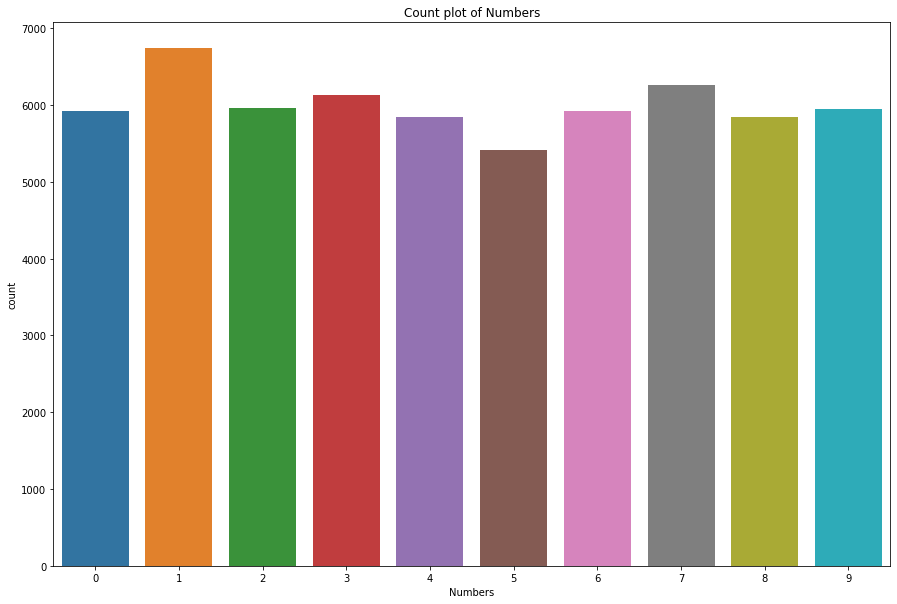

In [4]:
plt.figure(figsize=(15,10))
sns.countplot(y_train)
plt.xlabel('Numbers')
plt.title('Count plot of Numbers');

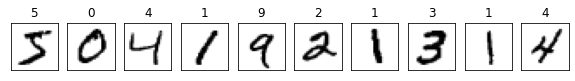

In [5]:
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=False, figsize=(10, 10))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

Preprocessing Dataset :

In [27]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
input_shape=(28,28,1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0
classes = 10

Model Architecture :

In [8]:
model = Sequential()
# Convolutional Layers
# 1st Layer
model.add(Conv2D(128, kernel_size=(3,3),
                activation=tf.nn.relu,
                input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#2nd Layer
model.add(Conv2D(64,(3,3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#3rd Layer
model.add(Conv2D(32,(3,3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully Connected Layers
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(classes, activation=tf.nn.softmax))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

Model Training :

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x=X_train,
                    y=y_train,
                    validation_split=0.1,
                    epochs=10)  

Epoch 1/10
1688/1688 [==============================] - 726s 429ms/step - loss: 0.2511 - accuracy: 0.9265 - val_loss: 0.0739 - val_accuracy: 0.9828
Epoch 2/10
1688/1688 [==============================] - 718s 426ms/step - loss: 0.1093 - accuracy: 0.9687 - val_loss: 0.1025 - val_accuracy: 0.9818
Epoch 3/10
1688/1688 [==============================] - 707s 419ms/step - loss: 0.0836 - accuracy: 0.9761 - val_loss: 0.0780 - val_accuracy: 0.9848
Epoch 4/10
1688/1688 [==============================] - 707s 419ms/step - loss: 0.0716 - accuracy: 0.9791 - val_loss: 0.1413 - val_accuracy: 0.9813
Epoch 5/10
1688/1688 [==============================] - 701s 415ms/step - loss: 0.0641 - accuracy: 0.9819 - val_loss: 0.2004 - val_accuracy: 0.9775
Epoch 6/10
1688/1688 [==============================] - 698s 414ms/step - loss: 0.0531 - accuracy: 0.9845 - val_loss: 0.1357 - val_accuracy: 0.9808
Epoch 7/10
1688/1688 [==============================] - 697s 413ms/step - loss: 0.0506 - accuracy: 0.9855 - val_

In [12]:
model_eval = model.evaluate(X_test, y_test)
print("Evaluation Loss: ", model_eval[0])
print("Evaluation Accuracy: " + str(round(model_eval[1]*100,2)) + "%")

313/313 [==============================] - 37s 119ms/step - loss: 0.1252 - accuracy: 0.9833
Evaluation Loss:  0.1252463012933731
Evaluation Accuracy: 98.33%


Evaluation Plots :

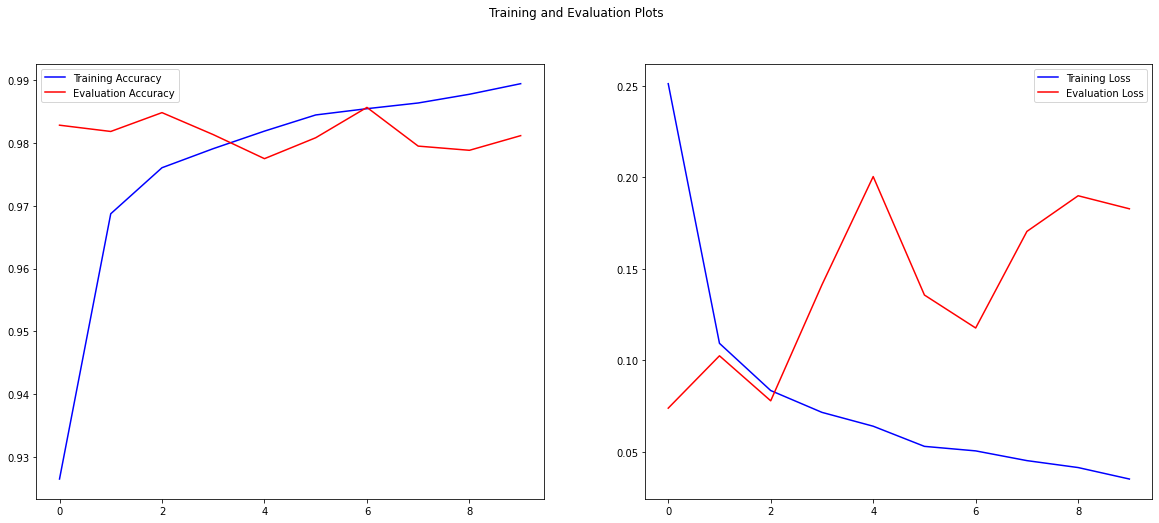

In [13]:
acc = history.history['accuracy']
v_acc = history.history['val_accuracy']
loss = history.history['loss']
v_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax[0].plot(epochs, acc, 'b', label='Training Accuracy')
ax[0].plot(epochs, v_acc, 'r', label='Evaluation Accuracy')
ax[0].legend(loc='best')
ax[1].plot(epochs, loss, 'b', label='Training Loss')
ax[1].plot(epochs, v_loss, 'r', label='Evaluation Loss')
ax[1].legend(loc='best')

plt.suptitle('Training and Evaluation Plots')
plt.show()

Confusion Matrix :

In [14]:
pred = model.predict(X_test)
pred_labels = [np.argmax(i) for i in pred]
conf_matrix = tf.math.confusion_matrix(labels=y_test, predictions = pred_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    1,    0,    0,    0,    0,    2,    1,    0,    0],
       [   0, 1134,    1,    0,    0,    0,    0,    0,    0,    0],
       [   1,   12, 1013,    0,    0,    0,    0,    6,    0,    0],
       [   0,    1,    0, 1005,    0,    2,    0,    2,    0,    0],
       [   0,   26,    0,    0,  928,    0,    5,    5,    2,   16],
       [   0,    1,    0,   10,    0,  879,    2,    0,    0,    0],
       [   4,    3,    0,    0,    1,    1,  949,    0,    0,    0],
       [   0,   10,    1,    0,    0,    0,    0, 1016,    1,    0],
       [   3,    7,    5,    1,    0,    0,    5,    3,  946,    4],
       [   1,   11,    0,    3,    1,    0,    0,    5,    1,  987]],
      dtype=int32)>

Heatmap : 

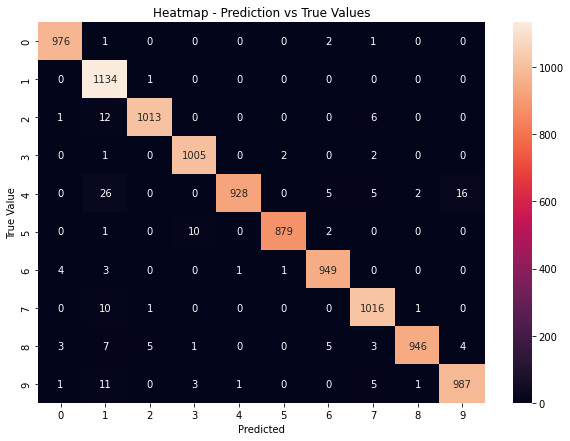

In [15]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.title('Heatmap - Prediction vs True Values')
plt.show();

Model Testing : 

Predicted Value:  3
Correct Prediction!!


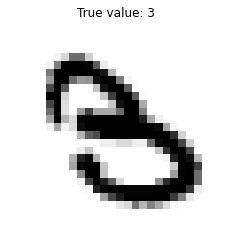

In [36]:
plt.imshow(X_test[18], cmap='gray_r')
plt.title('True value: {}'.format(y_test[18]))
pred = model.predict(X_test)

plt.axis('off')
print('Predicted Value: ', np.argmax(pred[18]))
if(y_test[18]==(np.argmax(pred[18]))):
    print('Correct Prediction!!')
else:
    print('Incorrect Prediction!!')

Predicted Value:  9
Correct Prediction!!


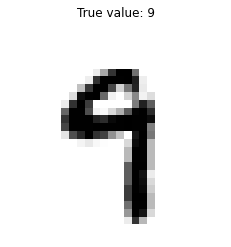

In [37]:
plt.imshow(X_test[108], cmap='gray_r')
plt.title('True value: {}'.format(y_test[108]))
pred = model.predict(X_test)

plt.axis('off')
print('Predicted Value: ', np.argmax(pred[108]))
if(y_test[108]==(np.argmax(pred[108]))):
    print('Correct Prediction!!')
else:
    print('Incorrect Prediction!!')

In [38]:
model.save('LGMTask7.h5')